# Bulldozer Price Predictor Machine Learning Model Project

## Problem Definition:
> A Bulldozer Company needs a Machine Learning Model to help them predict the price of Bulldozer using past data time series.

## Data:
> Our data is from Kaggle. It contains over 52 attributes. 52 columns, 400,000+ rows. To learn more about the data, check: https://www.kaggle.com/datasets/farhanreynaldo/blue-book-for-bulldozer

## Evaluation:
> This ML model would be be considered a success is if the RMSLE is minimized and reduced. It is a regression model, and therefore this is our success metric. 

## Features of Data:

> Our data has 52 attributes. Our data dictionary, explaining all about the features of the data is in this excel spreadsheet: 

### Preparing our work tools:

In [1]:
# Import libraries for massaging data and EDA 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import seaborn as sns

# Plot matplotlib inline
%matplotlib inline

In [2]:
#Let's read our data

df = pd.read_csv("Dataset/TrainAndValid.csv", 
                 low_memory=False, 
                 parse_dates=["saledate"])
df.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,2006-11-16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,2004-03-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2004-02-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,High,2011-05-19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,Medium,2009-07-23,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   SalesID                   412698 non-null  int64         
 1   SalePrice                 412698 non-null  float64       
 2   MachineID                 412698 non-null  int64         
 3   ModelID                   412698 non-null  int64         
 4   datasource                412698 non-null  int64         
 5   auctioneerID              392562 non-null  float64       
 6   YearMade                  412698 non-null  int64         
 7   MachineHoursCurrentMeter  147504 non-null  float64       
 8   UsageBand                 73670 non-null   object        
 9   saledate                  412698 non-null  datetime64[ns]
 10  fiModelDesc               412698 non-null  object        
 11  fiBaseModel               412698 non-null  object        
 12  fi

In [4]:
df.describe()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter
count,4.126980e+05,412698.000000,4.126980e+05,412698.000000,412698.000000,392562.000000,412698.000000,1.475040e+05
mean,2.011161e+06,31215.181414,1.230061e+06,6947.201828,135.169361,6.585268,1899.049637,3.522988e+03
std,1.080068e+06,23141.743695,4.539533e+05,6280.824982,9.646749,17.158409,292.190243,2.716993e+04
min,1.139246e+06,4750.000000,0.000000e+00,28.000000,121.000000,0.000000,1000.000000,0.000000e+00
25%,1.421898e+06,14500.000000,1.088593e+06,3261.000000,132.000000,1.000000,1985.000000,0.000000e+00
50%,1.645852e+06,24000.000000,1.284397e+06,4605.000000,132.000000,2.000000,1995.000000,0.000000e+00
75%,2.261012e+06,40000.000000,1.478079e+06,8899.000000,136.000000,4.000000,2001.000000,3.209000e+03
max,6.333349e+06,142000.000000,2.486330e+06,37198.000000,173.000000,99.000000,2014.000000,2.483300e+06


In [5]:
len(df)

412698

In [6]:
df.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension     

In [7]:
df.isnull()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,False,False
1,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,False,False
2,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True
3,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True
4,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
412693,False,False,False,False,False,False,False,True,True,False,...,False,False,False,False,False,True,True,True,True,True
412694,False,False,False,False,False,False,False,True,True,False,...,False,False,False,False,False,True,True,True,True,True
412695,False,False,False,False,False,False,False,True,True,False,...,False,False,False,False,False,True,True,True,True,True
412696,False,False,False,False,False,False,False,True,True,False,...,False,False,False,False,False,True,True,True,True,True


In [8]:
for label, content in df.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            df[label]=content.fillna(content.median())

In [9]:
df.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                     0
YearMade                         0
MachineHoursCurrentMeter         0
UsageBand                   339028
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension     

In [10]:
df.dtypes

SalesID                              int64
SalePrice                          float64
MachineID                            int64
ModelID                              int64
datasource                           int64
auctioneerID                       float64
YearMade                             int64
MachineHoursCurrentMeter           float64
UsageBand                           object
saledate                    datetime64[ns]
fiModelDesc                         object
fiBaseModel                         object
fiSecondaryDesc                     object
fiModelSeries                       object
fiModelDescriptor                   object
ProductSize                         object
fiProductClassDesc                  object
state                               object
ProductGroup                        object
ProductGroupDesc                    object
Drive_System                        object
Enclosure                           object
Forks                               object
Pad_Type   

In [11]:
for label, content in df.items():
    if pd.api.types.is_object_dtype(content):
        df[label+"_is_missing"] = pd.isnull(content)
        df[label] = pd.Categorical(content).codes+1

In [12]:
df.isna().sum()

SalesID                         0
SalePrice                       0
MachineID                       0
ModelID                         0
datasource                      0
                               ..
Backhoe_Mounting_is_missing     0
Blade_Type_is_missing           0
Travel_Controls_is_missing      0
Differential_Type_is_missing    0
Steering_Controls_is_missing    0
Length: 97, dtype: int64

In [13]:
df.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,2,2006-11-16,...,True,True,True,True,True,True,True,True,False,False
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,2,2004-03-26,...,True,True,True,True,True,True,True,True,False,False
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,1,2004-02-26,...,True,True,True,True,True,True,True,True,True,True
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,1,2011-05-19,...,True,True,True,True,True,True,True,True,True,True
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,3,2009-07-23,...,True,True,True,True,True,True,True,True,True,True


In [14]:
df.sort_values(by=["saledate"], inplace=True, ascending=True)

In [15]:
df["saledate"]

205615   1989-01-17
274835   1989-01-31
141296   1989-01-31
212552   1989-01-31
62755    1989-01-31
            ...    
410879   2012-04-28
412476   2012-04-28
411927   2012-04-28
407124   2012-04-28
409203   2012-04-28
Name: saledate, Length: 412698, dtype: datetime64[ns]

In [16]:
df_tmp = df.copy()

In [17]:
df_tmp.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
205615,1646770,9500.0,1126363,8434,132,18.0,1974,0.0,0,1989-01-17,...,True,True,True,True,True,False,False,False,True,True
274835,1821514,14000.0,1194089,10150,132,99.0,1980,0.0,0,1989-01-31,...,True,True,True,True,True,True,True,True,False,False
141296,1505138,50000.0,1473654,4139,132,99.0,1978,0.0,0,1989-01-31,...,True,True,True,True,True,False,False,False,True,True
212552,1671174,16000.0,1327630,8591,132,99.0,1980,0.0,0,1989-01-31,...,True,True,True,True,True,True,True,True,False,False
62755,1329056,22000.0,1336053,4089,132,99.0,1984,0.0,0,1989-01-31,...,True,True,True,True,True,False,False,False,True,True


In [18]:
#Add columns for days, months, year and remove the saledate column
df_tmp["saleYear"] = df_tmp.saledate.dt.year
df_tmp["saleMonth"] = df_tmp.saledate.dt.month
df_tmp["saleDay"] = df_tmp.saledate.dt.day
df_tmp["saleDayOfWeek"] = df_tmp.saledate.dt.dayofweek
df_tmp["saleDayOfYear"] = df_tmp.saledate.dt.dayofyear
df_tmp.drop("saledate", axis=1, inplace=True)

In [19]:
df_tmp

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing,saleYear,saleMonth,saleDay,saleDayOfWeek,saleDayOfYear
205615,1646770,9500.0,1126363,8434,132,18.0,1974,0.0,0,4593,...,False,False,False,True,True,1989,1,17,1,17
274835,1821514,14000.0,1194089,10150,132,99.0,1980,0.0,0,1820,...,True,True,True,False,False,1989,1,31,1,31
141296,1505138,50000.0,1473654,4139,132,99.0,1978,0.0,0,2348,...,False,False,False,True,True,1989,1,31,1,31
212552,1671174,16000.0,1327630,8591,132,99.0,1980,0.0,0,1819,...,True,True,True,False,False,1989,1,31,1,31
62755,1329056,22000.0,1336053,4089,132,99.0,1984,0.0,0,2119,...,False,False,False,True,True,1989,1,31,1,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
410879,6302984,16000.0,1915521,5266,149,99.0,2001,0.0,0,2101,...,False,False,False,True,True,2012,4,28,5,119
412476,6324811,6000.0,1919104,19330,149,99.0,2004,0.0,0,240,...,True,True,True,True,True,2012,4,28,5,119
411927,6313029,16000.0,1918416,17244,149,99.0,2004,0.0,0,627,...,True,True,True,True,True,2012,4,28,5,119
407124,6266251,55000.0,509560,3357,149,99.0,1993,0.0,0,83,...,True,True,True,True,True,2012,4,28,5,119


In [20]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 412698 entries, 205615 to 409203
Columns: 101 entries, SalesID to saleDayOfYear
dtypes: bool(44), float64(3), int16(4), int64(10), int8(40)
memory usage: 80.3 MB


In [21]:
df.isna().sum()

SalesID                         0
SalePrice                       0
MachineID                       0
ModelID                         0
datasource                      0
                               ..
Backhoe_Mounting_is_missing     0
Blade_Type_is_missing           0
Travel_Controls_is_missing      0
Differential_Type_is_missing    0
Steering_Controls_is_missing    0
Length: 97, dtype: int64

In [22]:
df_tmp.head(5).T

,205615,274835,141296,212552,62755
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
...,...,...,...,...,...
saleYear,1989,1989,1989,1989,1989
saleMonth,1,1,1,1,1
saleDay,17,31,31,31,31
saleDayOfWeek,1,1,1,1,1


In [23]:
df_tmp.to_csv("processed-training-and-valid-data-1.csv")

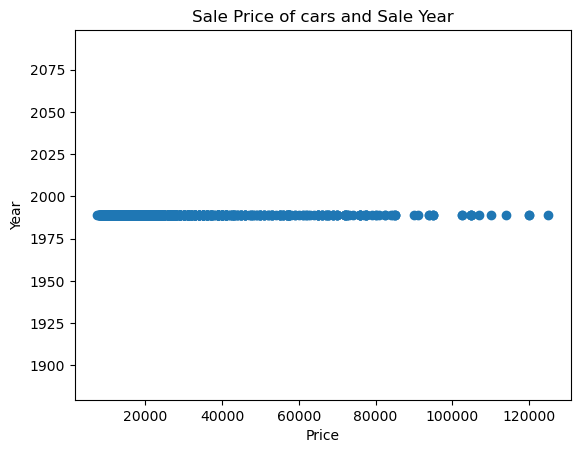

In [24]:
fig, ax = plt.subplots()
ax.scatter(df_tmp["SalePrice"][:1000], df_tmp["saleYear"][:1000])
plt.title("Sale Price of cars and Sale Year")
plt.xlabel("Price")
plt.ylabel("Year");

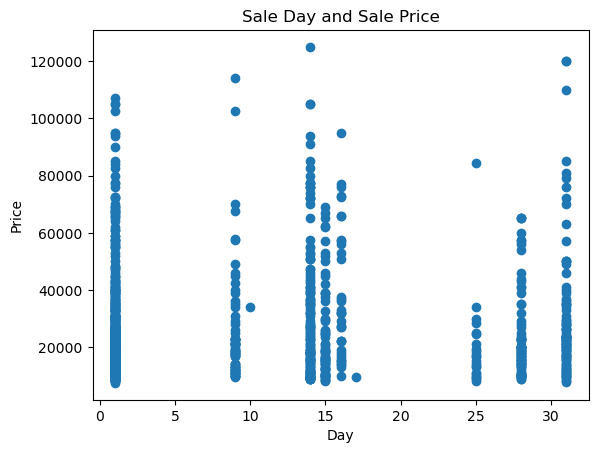

In [25]:
fig, ax = plt.subplots()
ax.scatter(df_tmp["saleDay"][:1000], df_tmp["SalePrice"][:1000])
plt.title("Sale Day and Sale Price")
plt.xlabel("Day")
plt.ylabel("Price");

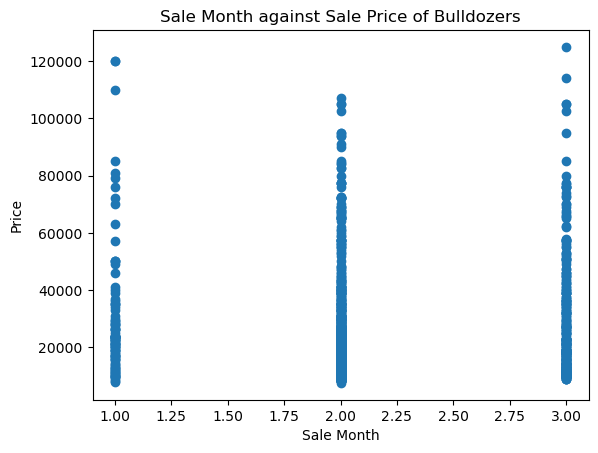

In [26]:
fig, ax = plt.subplots()
ax.scatter(df_tmp["saleMonth"][:1000], df_tmp["SalePrice"][:1000])
plt.title("Sale Month against Sale Price of Bulldozers")
plt.xlabel("Sale Month")
plt.ylabel("Price");

In [27]:
df_tmp.tail()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing,saleYear,saleMonth,saleDay,saleDayOfWeek,saleDayOfYear
410879,6302984,16000.0,1915521,5266,149,99.0,2001,0.0,0,2101,...,False,False,False,True,True,2012,4,28,5,119
412476,6324811,6000.0,1919104,19330,149,99.0,2004,0.0,0,240,...,True,True,True,True,True,2012,4,28,5,119
411927,6313029,16000.0,1918416,17244,149,99.0,2004,0.0,0,627,...,True,True,True,True,True,2012,4,28,5,119
407124,6266251,55000.0,509560,3357,149,99.0,1993,0.0,0,83,...,True,True,True,True,True,2012,4,28,5,119
409203,6283635,34000.0,1869284,4701,149,99.0,1000,0.0,0,989,...,True,True,True,False,False,2012,4,28,5,119


In [30]:
from sklearn.ensemble import RandomForestRegressor

In [48]:
#Split Data into train and validation set
df_train = df_tmp[df_tmp.saleYear != 2012]
df_val = df_tmp[df_tmp.saleYear == 2012]

#Split data into traing and testing set
X_train, y_train = df_train.drop("SalePrice", axis=1), df_train.SalePrice
X_valid, y_valid = df_val.drop("SalePrice", axis=1), df_val.SalePrice

X_train.shape, y_train.shape, X_valid.shape, y_valid.shape

((401125, 100), (401125,), (11573, 100), (11573,))

In [49]:
#Instatiatating our model

model = RandomForestRegressor(n_jobs=-1,
                             max_samples=10000)

In [50]:
#Training the model
model.fit(X_train, y_train)

RandomForestRegressor(max_samples=10000, n_jobs=-1)

In [51]:
model.score(X_train, y_train)

0.8611509475006949

In [44]:
model.score(X_valid, y_valid)

0.8346271983182127

In [52]:
# Create evaluation function (the competition uses Root Mean Square Log Error)
from sklearn.metrics import mean_squared_log_error, mean_absolute_error

def rmsle(y_test, y_preds):
    return np.sqrt(mean_squared_log_error(y_test, y_preds))

# Create function to evaluate our model
def show_scores(model):
    train_preds = model.predict(X_train)
    val_preds = model.predict(X_valid)
    scores = {"Training MAE": mean_absolute_error(y_train, train_preds),
              "Valid MAE": mean_absolute_error(y_valid, val_preds),
              "Training RMSLE": rmsle(y_train, train_preds),
              "Valid RMSLE": rmsle(y_valid, val_preds),
              "Training R^2": model.score(X_train, y_train),
              "Valid R^2": model.score(X_valid, y_valid)}
    return scores

In [53]:
show_scores(model)

{'Training MAE': 5544.69376184481,
 'Valid MAE': 7136.167959906679,
 'Training RMSLE': 0.256945873692381,
 'Valid RMSLE': 0.2923465510298749,
 'Training R^2': 0.8611509475006949,
 'Valid R^2': 0.8351166280117952}

## Hyperparameter Tuning with RandomizedSearchCV

In [55]:
from sklearn.model_selection import RandomizedSearchCV

# Different RandomForestClassifier hyperparameters
rf_grid = {"n_estimators": np.arange(10, 100, 10),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2),
           "max_features": [0.5, 1, "sqrt", "auto"],
           "max_samples": [10000]}

rs_model = RandomizedSearchCV(RandomForestRegressor(),
                              param_distributions=rf_grid,
                              n_iter=20,
                              cv=5,
                              verbose=True)

rs_model.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


C:\Users\hp\Documents\heart-disease-ml-project\env\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\Documents\heart-disease-ml-project\env\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\Documents\heart-disease-ml-project\env\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1

C:\Users\hp\Documents\heart-disease-ml-project\env\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\Documents\heart-disease-ml-project\env\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\Documents\heart-disease-ml-project\env\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt',
                                                         'auto'],
                                        'max_samples': [10000],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=True)

In [56]:
show_scores(rs_model)

{'Training MAE': 5815.728356205096,
 'Valid MAE': 7391.5752114349025,
 'Training RMSLE': 0.2671001118504006,
 'Valid RMSLE': 0.30134041078252316,
 'Training R^2': 0.847461666111183,
 'Valid R^2': 0.8200301387870097}

In [57]:
rs_model.best_params_

{'n_estimators': 40,
 'min_samples_split': 14,
 'min_samples_leaf': 1,
 'max_samples': 10000,
 'max_features': 'auto',
 'max_depth': None}

In [65]:
%%time

best_model = RandomForestRegressor(n_estimators = 40,
                                 min_samples_split= 14,
                                 min_samples_leaf= 1,
                                 max_samples= None,
                                 max_features= 'auto',
                                 max_depth= None)
best_model.fit(X_train, y_train)

C:\Users\hp\Documents\heart-disease-ml-project\env\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


CPU times: total: 11min 22s
Wall time: 12min 3s


RandomForestRegressor(max_features='auto', min_samples_split=14,
                      n_estimators=40)

In [67]:
show_scores(best_model)

{'Training MAE': 2836.3165119150344,
 'Valid MAE': 6137.234930562721,
 'Training RMSLE': 0.13992419238571405,
 'Valid RMSLE': 0.2534888551148489,
 'Training R^2': 0.961097257025891,
 'Valid R^2': 0.8714580723752012}

In [68]:
best_model.predict(X_valid)

array([35510.50822616, 81557.89508645, 19777.51481368, ...,
       18044.66800181, 65365.46441476, 36797.27146316])

In [69]:
y_valid

405675    46173.2
401133    66000.0
406076    26800.0
409018    42100.0
409026    62100.0
           ...   
410879    16000.0
412476     6000.0
411927    16000.0
407124    55000.0
409203    34000.0
Name: SalePrice, Length: 11573, dtype: float64

In [71]:
##Import the test Data to evaluate the model
df_test = pd.read_csv("Dataset/test.csv", 
                      low_memory=False, 
                      parse_dates=["saledate"])

In [72]:
for label, content in df_test.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            df_test[label]=content.fillna(content.median())

In [73]:
for label, content in df_test.items():
    if pd.api.types.is_object_dtype(content):
        df_test[label+"_is_missing"] = pd.isnull(content)
        df_test[label] = pd.Categorical(content).codes+1

In [75]:
df_test.sort_values(by=["saledate"], inplace=True, ascending=True)

#Add columns for days, months, year and remove the saledate column
df_test["saleYear"] = df_test.saledate.dt.year
df_test["saleMonth"] = df_test.saledate.dt.month
df_test["saleDay"] = df_test.saledate.dt.day
df_test["saleDayOfWeek"] = df_test.saledate.dt.dayofweek
df_test["saleDayOfYear"] = df_test.saledate.dt.dayofyear
df_test.drop("saledate", axis=1, inplace=True)

In [76]:
df_test.isna().sum()

SalesID          0
MachineID        0
ModelID          0
datasource       0
auctioneerID     0
                ..
saleYear         0
saleMonth        0
saleDay          0
saleDayOfWeek    0
saleDayOfYear    0
Length: 100, dtype: int64

In [78]:
X_test = df_test

In [80]:
results = best_model.predict(X_test)

In [82]:
# Create DataFrame compatible with Kaggle submission requirements
df_preds = pd.DataFrame()
df_preds["SalesID"] = X_test["SalesID"]
df_preds["SalePrice"] = results
df_preds

,SalesID,SalePrice
1408,4317459,11431.616788
1727,4390262,11478.608089
1246,4291634,55031.720075
1146,4270062,12868.456804
1551,4354444,53480.224443
...,...,...
12399,6642253,22447.086193
11851,6636548,62488.796393
12344,6640350,42553.661389
9373,6468176,75776.548164


In [83]:
df_preds.to_csv("Dataset/predictions.csv")

## Features Imporance

> What are the features that contributed most to the predcitions of our model?

In [87]:
best_model.feature_importances_

array([4.72694972e-02, 1.24350158e-02, 3.15294342e-02, 1.88808595e-04,
       3.17436446e-03, 2.70667767e-01, 2.43578665e-03, 8.38101781e-04,
       1.95626976e-02, 8.49106017e-02, 5.27601225e-02, 4.27656869e-03,
       3.48403454e-03, 2.36104444e-01, 4.14070705e-02, 6.22886059e-03,
       1.67648851e-04, 1.55972660e-04, 1.76181574e-03, 8.85322074e-03,
       3.17441748e-04, 2.41976981e-05, 4.61935332e-04, 1.69253581e-04,
       1.42884289e-03, 1.97734596e-05, 4.19795191e-04, 2.50613176e-03,
       5.30891748e-04, 1.99849205e-03, 3.79945769e-03, 2.42832399e-03,
       2.06315332e-03, 2.88628246e-03, 1.68172768e-04, 1.48999717e-03,
       7.22026493e-04, 1.72532589e-02, 1.10773862e-05, 5.91168846e-06,
       1.55101991e-04, 8.92784909e-04, 9.42265645e-04, 5.49512377e-04,
       1.46676977e-04, 3.18329200e-04, 1.73638254e-04, 1.33438730e-03,
       8.27970333e-04, 1.30444929e-04, 1.86555411e-04, 1.31363266e-04,
       0.00000000e+00, 0.00000000e+00, 9.67520707e-04, 6.40429782e-04,
      

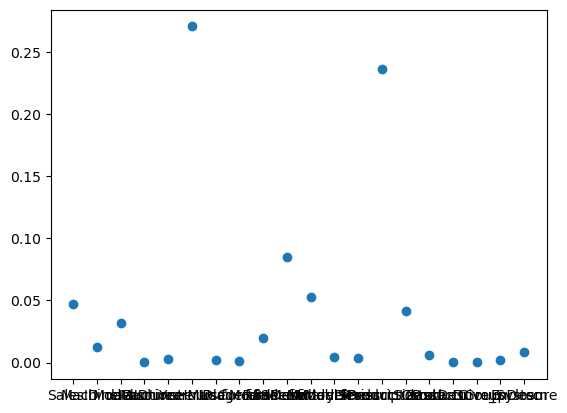

In [115]:
fig, ax = plt.subplots()
ax.scatter(X_columns[:20], best_model.feature_importances_[:20]);